In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from google.colab import drive
import nltk
from nltk.tokenize import sent_tokenize

In [2]:

nltk.download('punkt', quiet=True)
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
f = open('/content/drive/MyDrive/AIDATA/scrambled_lena.mat')

for i in range(5):
    f.readline()

m = []

line = f.readline()
while line[1:]!='':
    val = int(line[1:])
    m.append(val)
    line = f.readline()

x = np.array(m)
mat = x.reshape(512,512).T

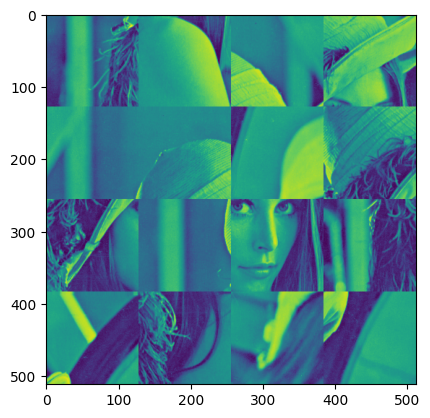

In [4]:

plt.imshow(mat)

In [5]:
class Energy:
    def __init__(self, image):
        self.image = image
        self.height = 4
        self.width = 4

    def getLeftRightEnergy(self, tile):
        try:
            i, j = tile
            x1 = 128 * i
            x2 = 128 * (i + 1)
            y = 128 * (j + 1) - 1
            diff = self.image[x1:x2,y] - self.image[x1:x2,y + 1]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getUpDownEnergy(self, tile):
        try:
            i, j = tile
            y1 = 128 * j
            y2 = 128 * (j + 1)
            x = 128 * (i + 1) - 1
            diff = self.image[x, y1:y2] - self.image[x + 1, y1:y2]
            return np.sqrt((diff**2).mean())
        except IndexError:
            return 0

    def getEnergyAround(self, tile):
        i, j = tile
        e = np.zeros(4)
        e[0] = self.getLeftRightEnergy((i,j-1))
        e[1] = self.getLeftRightEnergy((i,j))
        e[2] = self.getUpDownEnergy((i-1,j))
        e[3] = self.getUpDownEnergy((i,j))
        return e.sum()

    def getEnergyAround2Tiles(self, t1, t2):
        return self.getEnergyAround(t1) + self.getEnergyAround(t2)

    def energy(self):
        energy = 0
        for i in range(1, self.height - 1):
            for j in range(1, self.width - 1):
                energy += self.getEnergyAround((i, j))
        return energy


In [6]:

e = Energy(image = mat)
e.energy()

np.float64(1035.15508413872)

In [7]:
def get_image_from_arrangement(arrangement, original_image):
    """Reconstructs the image based on a tile arrangement."""
    tile_size = 128
    rows = 4
    cols = 4
    reconstructed_image = np.zeros_like(original_image)
    for index, tile_index in enumerate(arrangement):
        row_orig = tile_index // cols
        col_orig = tile_index % cols
        row_reconstructed = index // cols
        col_reconstructed = index % cols
        reconstructed_image[row_reconstructed * tile_size:(row_reconstructed + 1) * tile_size,
                              col_reconstructed * tile_size:(col_reconstructed + 1) * tile_size] = \
            original_image[row_orig * tile_size:(row_orig + 1) * tile_size,
                             col_orig * tile_size:(col_orig + 1) * tile_size]
    return reconstructed_image

initial_temperature = 100.0
cooling_rate = 0.995
num_iterations = 1000

current_arrangement = list(range(16))
current_image = get_image_from_arrangement(current_arrangement, mat)
energy_calculator = Energy(current_image)
current_energy = energy_calculator.energy()

best_arrangement = list(current_arrangement)
best_energy = current_energy

temperature = initial_temperature

for i in range(num_iterations):
    new_arrangement = list(current_arrangement)
    idx1, idx2 = np.random.choice(len(new_arrangement), 2, replace=False)
    new_arrangement[idx1], new_arrangement[idx2] = new_arrangement[idx2], new_arrangement[idx1]

    new_image = get_image_from_arrangement(new_arrangement, mat)
    new_energy_calculator = Energy(new_image)
    new_energy = new_energy_calculator.energy()


    delta_energy = new_energy - current_energy
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        current_arrangement = list(new_arrangement)
        current_energy = new_energy

        if current_energy < best_energy:
            best_energy = current_energy
            best_arrangement = list(current_arrangement)

    temperature *= cooling_rate

print(f"Best energy found: {best_energy}")
print(f"Best arrangement found: {best_arrangement}")

Best energy found: 263.4498171506358
Best arrangement found: [6, 10, 1, 11, 15, 4, 5, 2, 14, 9, 7, 3, 13, 0, 8, 12]


In [8]:
tile_arrangement = list(range(16))

In [11]:
def get_image_from_arrangement(arrangement, original_image):
    """Reconstructs the image based on a tile arrangement."""
    tile_size = 128
    rows = 4
    cols = 4
    reconstructed_image = np.zeros_like(original_image)
    for index, tile_index in enumerate(arrangement):
        row_orig = tile_index // cols
        col_orig = tile_index % cols
        row_reconstructed = index // cols
        col_reconstructed = index % cols
        reconstructed_image[row_reconstructed * tile_size:(row_reconstructed + 1) * tile_size,
                              col_reconstructed * tile_size:(col_reconstructed + 1) * tile_size] = \
            original_image[row_orig * tile_size:(row_orig + 1) * tile_size,
                             col_orig * tile_size:(col_orig + 1) * tile_size]
    return reconstructed_image

initial_temperature = 100.0
cooling_rate = 0.995
num_iterations = 1000

current_arrangement = list(range(16))
current_image = get_image_from_arrangement(current_arrangement, mat)
energy_calculator = Energy(current_image)
current_energy = energy_calculator.energy()

best_arrangement = list(current_arrangement)
best_energy = current_energy

temperature = initial_temperature

for i in range(num_iterations):
    new_arrangement = list(current_arrangement)
    idx1, idx2 = np.random.choice(len(new_arrangement), 2, replace=False)
    new_arrangement[idx1], new_arrangement[idx2] = new_arrangement[idx2], new_arrangement[idx1]

    new_image = get_image_from_arrangement(new_arrangement, mat)
    new_energy_calculator = Energy(new_image)
    new_energy = new_energy_calculator.energy()

    delta_energy = new_energy - current_energy
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        current_arrangement = list(new_arrangement)
        current_energy = new_energy

        if current_energy < best_energy:
            best_energy = current_energy
            best_arrangement = list(current_arrangement)

    temperature *= cooling_rate

print(f"Best energy found: {best_energy}")
print(f"Best arrangement found: {best_arrangement}")

# accuracy (percentage of tiles in the correct position)
correctly_placed_tiles = sum(1 for i, tile_index in enumerate(best_arrangement) if tile_index == i)
accuracy_percentage = (correctly_placed_tiles / len(best_arrangement)) * 100
print(f"Accuracy percentage: {accuracy_percentage:.2f}%")

Best energy found: 359.19382037540583
Best arrangement found: [6, 12, 10, 2, 3, 15, 1, 14, 13, 9, 7, 5, 4, 0, 8, 11]
Accuracy percentage: 6.25%


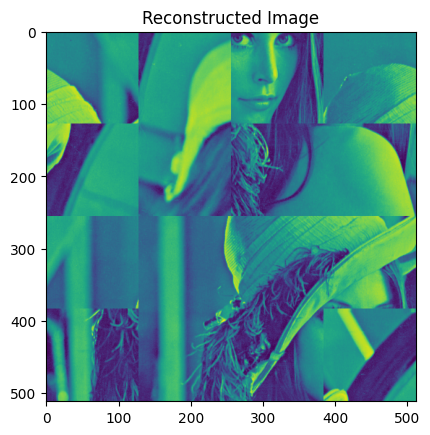

In [10]:
reconstructed_image = get_image_from_arrangement(best_arrangement, mat)

plt.imshow(reconstructed_image)
plt.title("Reconstructed Image")
plt.show()